In [1]:
import tensorflow
import gym

In [10]:
#env = gym.make('CartPole-v0')
env = gym.make('CartPole-v2')
#env = gym.make('CartPoleEnv')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action

You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


## Observations

Num 	Observation 	Min 	Max

0 	Cart Position 	-2.4 	2.4

1 	Cart Velocity 	-Inf 	Inf

2 	Pole Angle 	~ -41.8° 	~ 41.8°

3 	Pole Velocity At Tip 	-Inf 	Inf


## Actions
0 	Push cart to the left
1 	Push cart to the right


Source: 
https://github.com/openai/gym/wiki/CartPole-v0

In [16]:
import numpy as np
import itertools

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#import progressbar
import operator

# Similar to sum, but with multiplication
mul = lambda seq: reduce(operator.mul, seq)


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Global Variables
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++  

import gym
env  = gym.make('CartPole-v2')

o_space = env.observation_space
a_space = env.action_space

o_dim = o_space.shape[0]
o_high = o_space.high 
o_low = o_space.low 
o_range = zip(o_low,o_high)

#o_cells = [10,10,10,10]
o_cells = [30,30,30,30]
o_bins = [np.linspace( low, high, cells) for (low,high), cells in zip(o_range, o_cells)]

# Holds the offset which is required for calculating the linearized index from the cell indices
# The offset for each dimension is defined by the number of cells in previous dimensions
offset = [1]
for i in range(1,o_dim):
    offset.append( o_cells[i - 1] * offset[i - 1] )




#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Functions
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++  

obs_to_state_tuple = lambda obs: [ int(np.digitize(obs[i], o_bins[i])) for i in range(o_dim)]
obs_to_state = lambda obs: sum([ a * b for a,b in zip( obs_to_state_tuple(obs), offset)])

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Code to run the stuff
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++  

#NS = mul(o_cells)
NS = np.prod(o_cells)
NA = 2

gamma = 0.9 # Discount factor
alpha = 0.1 # Constant learning rate

Q = np.zeros( (NS,NA) )
pi = np.random.randint(0,NA, size = (NS,))

# list for storage of results
results = []
#rewards = []

for epoch in range(5000):
    print("Epoch:", epoch)
    print ("Training")
    o = env.reset()
    s = obs_to_state(o)

    # Adjust this to a suitable value for your computer
    for i in range(250):

        # IMPORTANT: This was not shown in the tutorial and is the reason why the agent did not get significantly better within the considered time.
        # Random actions are required to learn about other (s,a) tuples and not only about those, that are produced by following the policy pi
        #a = pi[s] if np.random.rand() < 0.90 else a_space.sample()
        a = pi[s] if np.random.rand() < 0.5 else a_space.sample()

        o2, r, done, _ = env.step(a)

        s2 = obs_to_state(o2)

        # Handle episodic tasks
        Q2 = Q[s2, :].max() if not done else 0.0

        # TD target
        Q_tgt = r + gamma * Q2

        # TD error
        delta = Q_tgt - Q[s, a]

        # Q-Learning
        Q[s,a] = Q[s,a] + alpha * delta

        # Next policy
        pi = Q.argmax(1)

        # Copy values for next round
        s = s2

        if done:
            o = env.reset()
            s = obs_to_state(o)
        #end if
    #end for training
    #rewards.append(r)

    print("Running")
    for i in range(1):
        c = 0
        o = env.reset()
        done = False
        
    while not done:
        c += 1
        s = obs_to_state(o)
        a = pi[s] 
        o, _, done, _ = env.step(a)
        env.render()

    #end while
    results.append(c)
    print("Steps: " , c)
    #end for running
#end for epochs


Epoch: 0
Training
Running
Steps:  13
Epoch: 1
Training
Running
Steps:  12
Epoch: 2
Training
Running
Steps:  12
Epoch: 3
Training
Running
Steps:  12
Epoch: 4
Training
Running
Steps:  20
Epoch: 5
Training
Running
Steps:  21
Epoch: 6
Training
Running
Steps:  13
Epoch: 7
Training
Running
Steps:  12
Epoch: 8
Training
Running
Steps:  17
Epoch: 9
Training
Running
Steps:  14
Epoch: 10
Training
Running
Steps:  12
Epoch: 11
Training
Running
Steps:  17
Epoch: 12
Training
Running
Steps:  19
Epoch: 13
Training
Running
Steps:  12
Epoch: 14
Training
Running
Steps:  14
Epoch: 15
Training
Running
Steps:  14
Epoch: 16
Training
Running
Steps:  10
Epoch: 17
Training
Running
Steps:  14
Epoch: 18
Training
Running
Steps:  17
Epoch: 19
Training
Running
Steps:  11
Epoch: 20
Training
Running
Steps:  15
Epoch: 21
Training
Running
Steps:  13
Epoch: 22
Training
Running
Steps:  16
Epoch: 23
Training
Running
Steps:  17
Epoch: 24
Training
Running
Steps:  12
Epoch: 25
Training
Running
Steps:  14
Epoch: 26
Training
Run

ArgumentError: argument 2: <class 'TypeError'>: wrong type

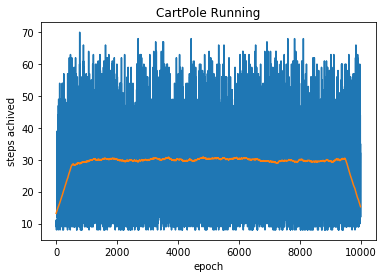

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

plt.plot(results)
results_mean = movingaverage(results, 1000)
plt.plot(results_mean)
plt.title('CartPole Running')
plt.xlabel('epoch')
plt.ylabel('steps achived')
plt.show()


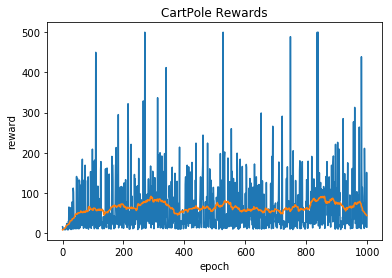

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

plt.plot(results)
results_mean = movingaverage(results, 50)
plt.plot(results_mean)
plt.title('CartPole Rewards')
plt.xlabel('epoch')
plt.ylabel('reward')
plt.show()

In [50]:
import gym
from gym import wrappers
import numpy

NUM_EPISODES=3000
N_BINS = [8, 8, 8, 8]
MAX_STEPS = 200
FAIL_PENALTY = -100
EPSILON=0.5
EPSILON_DECAY=0.99
LEARNING_RATE=0.05
DISCOUNT_FACTOR=0.9

RECORD=True

MIN_VALUES = [-0.5,-2.0,-0.5,-3.0]
MAX_VALUES = [0.5,2.0,0.5,3.0]
BINS = [numpy.linspace(MIN_VALUES[i], MAX_VALUES[i], N_BINS[i]) for i in range(4)]


class QLearningAgent:

    def __init__(self, legal_actions_fn, epsilon=0.5, alpha=0.5, gamma=0.9, epsilon_decay=1):
        """
        args
        legal_actions_fn    takes a state and returns a list of legal actions
        alpha       learning rate
        epsilon     exploration rate
        gamma       discount factor
        """
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon_decay=epsilon_decay
        self.legal_actions_fn = legal_actions_fn

    # map: {(state, action): q-value}
        self.q_values = {}
    # map: {state: action}
        self.policy = {}
    

    def get_value(self, s):
        a = self.get_action(s)
        return self.get_qvalue(s, a)


    def get_qvalue(self, s, a):
        if (s,a) in self.q_values:
            return self.q_values[(s,a)]
        else:
          # set to 0
            self.q_values[(s,a)] = 0
            return 0

    def _set_qvalue(self, s, a, v):
        self.q_values[(s,a)] = v


    def get_optimal_action(self, state):
        legal_actions = self.legal_actions_fn(state)
        assert len(legal_actions) > 0, "no legal actions"
        if state in self.policy:
            return self.policy[state]
        else:
        # randomly select an action as default and return
            self.policy[state] = legal_actions[numpy.random.randint(0, len(legal_actions))]
            return self.policy[state]

  
    def get_action(self, state):
        """
        Epsilon-greedy action
        args
        state           current state      
        returns
        an action to take given the state
        """
        legal_actions = self.legal_actions_fn(state)

        assert len(legal_actions) > 0, "no legal actions on state {}".format(state)

        if numpy.random.random() < self.epsilon:
        # act randomly
            self.epsilon = self.epsilon*self.epsilon_decay
            return legal_actions[numpy.random.randint(0, len(legal_actions))]
        else:
            if state in self.policy:
                return self.policy[state]
            else:
        # set the first action in the list to default and return
                self.policy[state] = legal_actions[0]
                return legal_actions[0]


    def learn(self, s, a, s1, r, is_done):
        """
        Updates self.q_values[(s,a)] and self.policy[s]
        args
        s         current state
        a         action taken
        s1        next state
        r         reward
        is_done   True if the episode concludes
        """
    # update q value
        if is_done:
            sample = r
        else:
            sample = r + self.gamma*max([self.get_qvalue(s1,a1) for a1 in self.legal_actions_fn(s1)])
    
        q_s_a = self.get_qvalue(s,a)
        q_s_a = q_s_a + self.alpha*(sample - q_s_a)
        self._set_qvalue(s,a,q_s_a)

        # policy improvement
        legal_actions = self.legal_actions_fn(s)
        s_q_values = [self.get_qvalue(s,a) for a in legal_actions]
        self.policy[s] = legal_actions[s_q_values.index(max(s_q_values))]



def discretize(obs):
    return tuple([int(numpy.digitize(obs[i], BINS[i])) for i in range(4)])


def train(agent, env, history, num_episodes=NUM_EPISODES):
    for i in range(NUM_EPISODES):
        if i % 100:
            print("Episode {}".format(i+1))

        obs = env.reset()
        cur_state = discretize(obs)

        for t in range(MAX_STEPS):
            action = agent.get_action(cur_state)
            observation, reward, done, info = env.step(action)
            next_state = discretize(observation)
        
            if done:
                reward = FAIL_PENALTY
                agent.learn(cur_state, action, next_state, reward, done)
                print("Episode finished after {} timesteps".format(t+1))
                history.append(t+1)
                break

            agent.learn(cur_state, action, next_state, reward, done)
            cur_state = next_state
            #env.render()

            if t == MAX_STEPS-1:
                history.append(t+1)
                print("Episode finished after {} timesteps".format(t+1))

    return agent, history


env = gym.make('CartPole-v2')
#if RECORD:
    #env = wrappers.Monitor(env, '/tmp/cartpole-experiment-1', force=True)
    #env.render()

def get_actions(state):
    return [0, 1]

agent=QLearningAgent(get_actions, 
                    epsilon=EPSILON, 
                    alpha=LEARNING_RATE, 
                    gamma=DISCOUNT_FACTOR, 
                    epsilon_decay=EPSILON_DECAY)

history = []

agent, history = train(agent, env, history)

#if RECORD:
#    env.monitor.close()


Episode finished after 39 timesteps
Episode 2
Episode finished after 22 timesteps
Episode 3
Episode finished after 24 timesteps
Episode 4
Episode finished after 20 timesteps
Episode 5
Episode finished after 20 timesteps
Episode 6
Episode finished after 28 timesteps
Episode 7
Episode finished after 32 timesteps
Episode 8
Episode finished after 36 timesteps
Episode 9
Episode finished after 27 timesteps
Episode 10
Episode finished after 35 timesteps
Episode 11
Episode finished after 35 timesteps
Episode 12
Episode finished after 48 timesteps
Episode 13
Episode finished after 24 timesteps
Episode 14
Episode finished after 36 timesteps
Episode 15
Episode finished after 43 timesteps
Episode 16
Episode finished after 30 timesteps
Episode 17
Episode finished after 48 timesteps
Episode 18
Episode finished after 21 timesteps
Episode 19
Episode finished after 23 timesteps
Episode 20
Episode finished after 34 timesteps
Episode 21
Episode finished after 39 timesteps
Episode 22
Episode finished afte

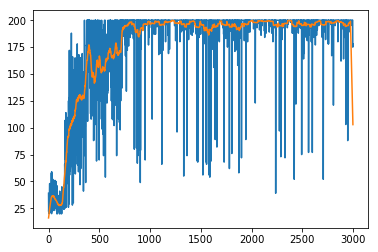

In [51]:

results_mean = movingaverage(history, 50)
plt.plot(history)
plt.plot(results_mean)
plt.show()